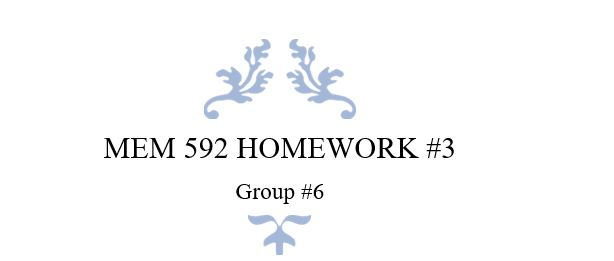

# Problem 1

## Part a)

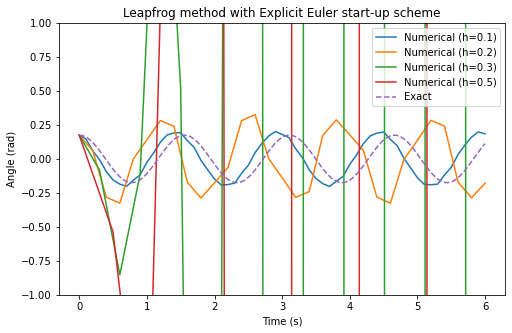

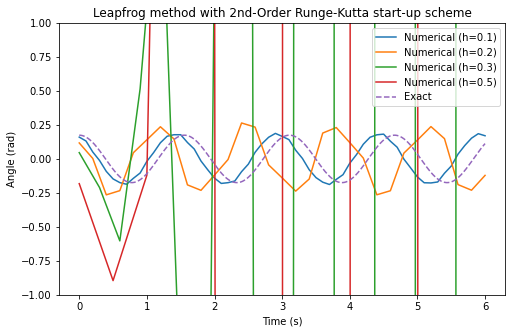

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
g = 9.81  # m/s^2
L = 0.6  # m
theta0 = np.radians(10)  # initial angle in radians
t0 = 0  # initial time
tf = 6  # final time
h_values = [0.1, 0.2, 0.3, 0.5]

# Define the differential equation
def f(theta, t):
    return np.array([theta[1], -g/L * theta[0]])

# Define the exact solution
def exact_solution(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

# Define the Leapfrog method
def leapfrog(f, y0, t0, tf, h, start_up):
    t = np.arange(t0, tf + h, h)
    y = np.zeros((len(t), 2))
    y[0] = start_up(f, y0, t0, h)
    y[1] = y[0] + h * f(y[0], t[0])
    for i in range(1, len(t) - 1):
        y[i+1] = y[i-1] + 2 * h * f(y[i], t[i])
    return t, y

# Define the start-up schemes
def explicit_euler(f, y0, t0, h):
    return y0 + h * f(y0, t0)

def rk2(f, y0, t0, h):
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + k1/2, t0 + h/2)
    return y0 + k2

# Solve the differential equation using the Leapfrog method and plot the results
exact_t = np.linspace(t0, tf, 1000)
exact_theta = exact_solution(exact_t)

plt.figure(figsize=(8, 5))
for i, h in enumerate(h_values):
    # Leapfrog method with Explicit Euler start-up scheme
    t, y = leapfrog(f, [theta0, 0], t0, tf, h, explicit_euler)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")

plt.plot(exact_t, exact_theta, "--", label="Exact")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.ylim([-1, 1])
plt.title("Leapfrog method with Explicit Euler start-up scheme")
plt.show()

plt.figure(figsize=(8, 5))
for i, h in enumerate(h_values):
    # Leapfrog method with 2nd-Order Runge-Kutta start-up scheme
    t, y = leapfrog(f, [theta0, 0], t0, tf, h, rk2)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")

plt.plot(exact_t, exact_theta, "--", label="Exact")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.ylim([-1, 1])
plt.title("Leapfrog method with 2nd-Order Runge-Kutta start-up scheme")
plt.show()


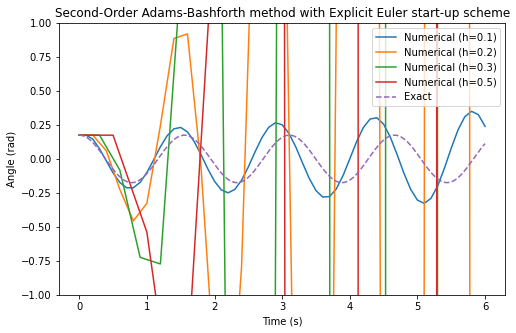

Text(0.5, 1.0, 'Second-Order Adams-Bashforth method with 2nd-Order Runge-Kutta start-up scheme')

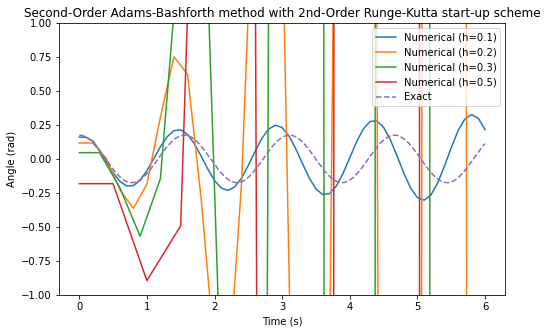

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
g = 9.81  # m/s^2
L = 0.6  # m
theta0 = np.radians(10)  # initial angle in radians
t0 = 0  # initial time
tf = 6  # final time
h_values = [0.1, 0.2, 0.3, 0.5]

# Define the differential equation
def f(theta, t):
    return np.array([theta[1], -g/L * theta[0]])

# Define the exact solution
def exact_solution(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

# Define the Second-Order Adams-Bashforth method
def ab2(f, y0, t0, tf, h, start_up):
    t = np.arange(t0, tf + h, h)
    y = np.zeros((len(t), 2))
    y[0] = start_up(f, y0, t0, h)
    y[1] = start_up(f, y0, t0 + h, h)
    for i in range(1, len(t) - 1):
        y[i+1] = y[i] + h/2 * (3*f(y[i], t[i]) - f(y[i-1], t[i-1]))
    return t, y

# Define the start-up schemes
def explicit_euler(f, y0, t0, h):
    return y0 + h * f(y0, t0)

def rk2(f, y0, t0, h):
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + k1/2, t0 + h/2)
    return y0 + k2

# Solve the differential equation using the Second-Order Adams-Bashforth method and plot the results
exact_t = np.linspace(t0, tf, 1000)
exact_theta = exact_solution(exact_t)

plt.figure(figsize=(8, 5))
for i, h in enumerate(h_values):
    # Second-Order Adams-Bashforth method with Explicit Euler start-up scheme
    t, y = ab2(f, [theta0, 0], t0, tf, h, explicit_euler)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")

plt.plot(exact_t, exact_theta, "--", label="Exact")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.ylim([-1, 1])
plt.title("Second-Order Adams-Bashforth method with Explicit Euler start-up scheme")
plt.show()

plt.figure(figsize=(8, 5))
for i, h in enumerate(h_values):
    # Second-Order Adams-Bashforth method with 2nd-Order Runge-Kutta start-up scheme
    t, y = ab2(f, [theta0, 0], t0, tf, h, rk2)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")

plt.plot(exact_t, exact_theta, "--", label="Exact")
plt.legend()
plt.xlabel("Time (s)")
plt.ylabel("Angle (rad)")
plt.ylim([-1, 1])
plt.title("Second-Order Adams-Bashforth method with 2nd-Order Runge-Kutta start-up scheme")


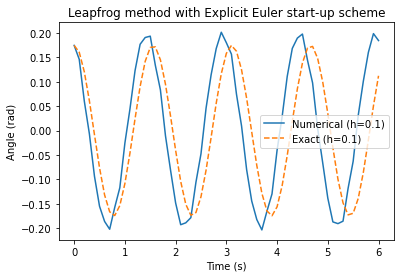

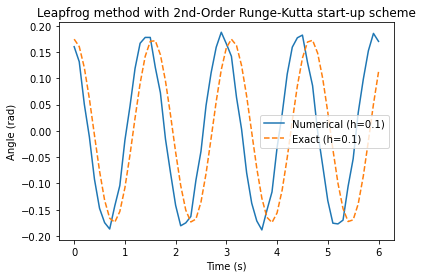

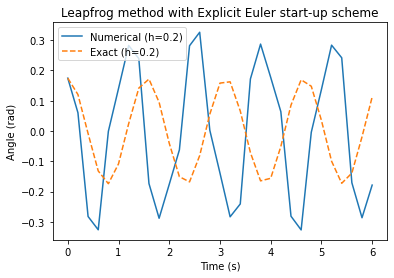

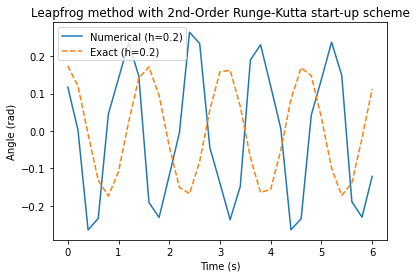

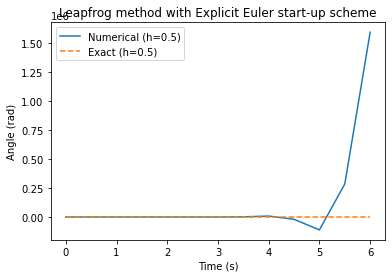

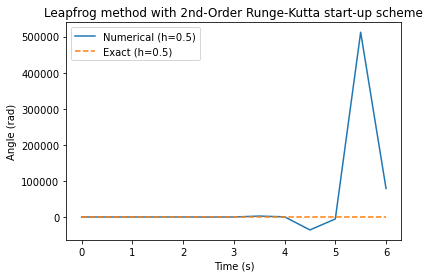

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
g = 9.81  # m/s^2
L = 0.6  # m
theta0 = np.radians(10)  # initial angle in radians
t0 = 0  # initial time
tf = 6  # final time

# Define the differential equation
def f(theta, t):
    return np.array([theta[1], -g/L * theta[0]])

# Define the exact solution
def exact_solution(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

# Define the Leapfrog method
def leapfrog(f, y0, t0, tf, h, start_up):
    t = np.arange(t0, tf + h, h)
    y = np.zeros((len(t), 2))
    y[0] = start_up(f, y0, t0, h)
    y[1] = y[0] + h * f(y[0], t[0])
    for i in range(1, len(t) - 1):
        y[i+1] = y[i-1] + 2 * h * f(y[i], t[i])
    return t, y

# Define the start-up schemes
def explicit_euler(f, y0, t0, h):
    return y0 + h * f(y0, t0)

def rk2(f, y0, t0, h):
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + k1/2, t0 + h/2)
    return y0 + k2

# Solve the differential equation using the Leapfrog method and plot the results
for h in [0.1, 0.2, 0.5]:
    # Leapfrog method with Explicit Euler start-up scheme
    t, y = leapfrog(f, [theta0, 0], t0, tf, h, explicit_euler)
    exact = exact_solution(t)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")
    plt.plot(t, exact, "--", label=f"Exact (h={h})")

    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title("Leapfrog method with Explicit Euler start-up scheme")
    plt.show()

    # Leapfrog method with 2nd-Order Runge-Kutta start-up scheme
    t, y = leapfrog(f, [theta0, 0], t0, tf, h, rk2)
    exact = exact_solution(t)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")
    plt.plot(t, exact, "--", label=f"Exact (h={h})")

    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title("Leapfrog method with 2nd-Order Runge-Kutta start-up scheme")
    plt.show()



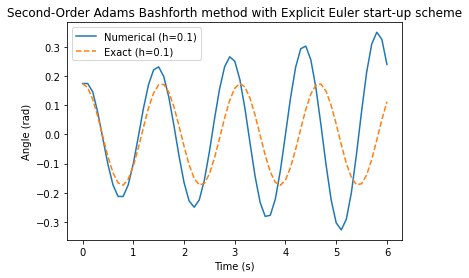

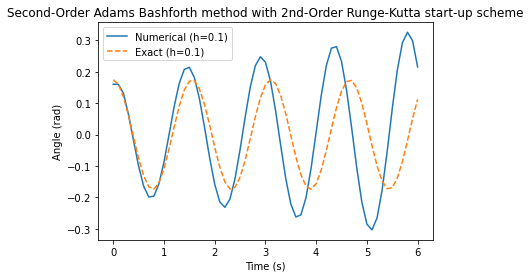

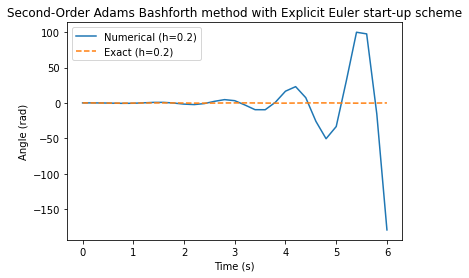

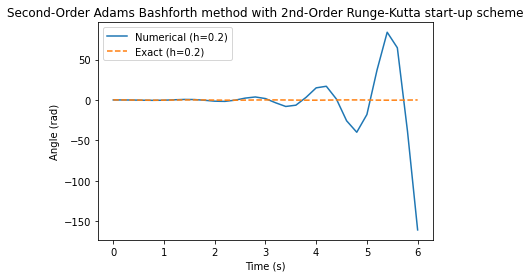

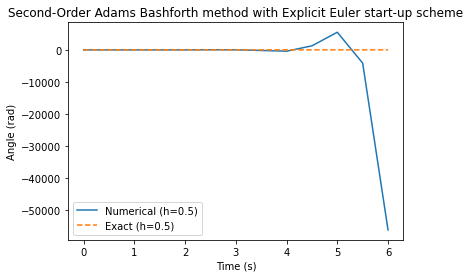

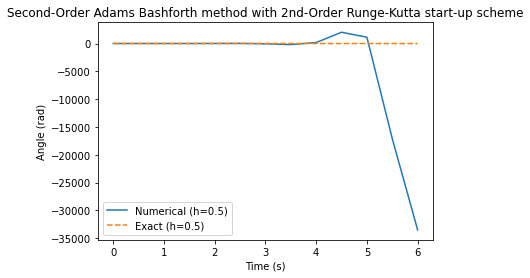

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define constants
g = 9.81  # m/s^2
L = 0.6  # m
theta0 = np.radians(10)  # initial angle in radians
t0 = 0  # initial time
tf = 6  # final time

# Define the differential equation
def f(theta, t):
    return np.array([theta[1], -g/L * theta[0]])

# Define the exact solution
def exact_solution(t):
    return theta0 * np.cos(np.sqrt(g/L) * t)

# Define the Second-Order Adams Bashforth method
def adams_bashforth2(f, y0, t0, tf, h, start_up):
    t = np.arange(t0, tf + h, h)
    y = np.zeros((len(t), 2))
    y[0] = start_up(f, y0, t0, h)
    y[1] = start_up(f, y0, t0, h)
    for i in range(1, len(t) - 1):
        y[i+1] = y[i] + h/2 * (3 * f(y[i], t[i]) - f(y[i-1], t[i-1]))
    return t, y

# Define the start-up schemes
def explicit_euler(f, y0, t0, h):
    return y0 + h * f(y0, t0)

def rk2(f, y0, t0, h):
    k1 = h * f(y0, t0)
    k2 = h * f(y0 + k1/2, t0 + h/2)
    return y0 + k2

# Solve the differential equation using the Second-Order Adams Bashforth method and plot the results
for h in [0.1, 0.2, 0.5]:
    # Second-Order Adams Bashforth method with Explicit Euler start-up scheme
    t, y = adams_bashforth2(f, [theta0, 0], t0, tf, h, explicit_euler)
    exact = exact_solution(t)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")
    plt.plot(t, exact, "--", label=f"Exact (h={h})")

    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title("Second-Order Adams Bashforth method with Explicit Euler start-up scheme")
    plt.show()

    # Second-Order Adams Bashforth method with 2nd-Order Runge-Kutta start-up scheme
    t, y = adams_bashforth2(f, [theta0, 0], t0, tf, h, rk2)
    exact = exact_solution(t)
    plt.plot(t, y[:, 0], label=f"Numerical (h={h})")
    plt.plot(t, exact, "--", label=f"Exact (h={h})")

    plt.legend()
    plt.xlabel("Time (s)")
    plt.ylabel("Angle (rad)")
    plt.title("Second-Order Adams Bashforth method with 2nd-Order Runge-Kutta start-up scheme")
    plt.show()


# Part b

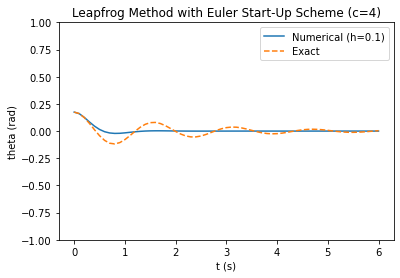

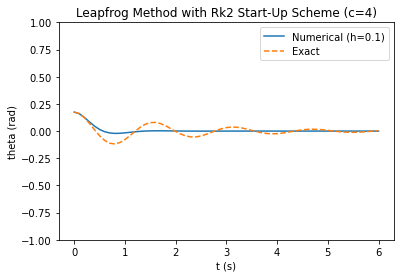

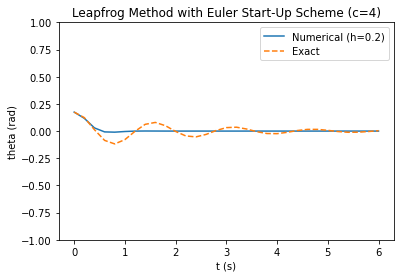

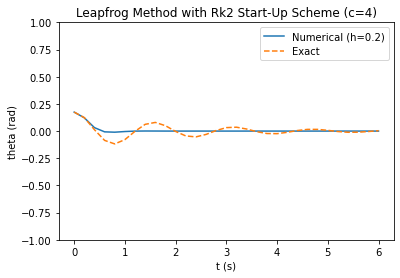

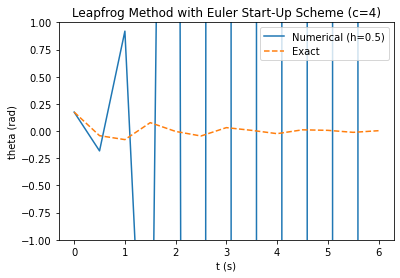

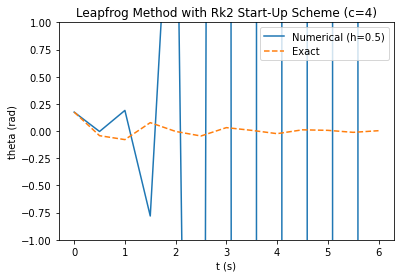

In [71]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
g = 9.81
L = 0.6
c = 4

# Define function for theta double dot
def theta_ddot(theta, theta_dot):
    return -c * theta_dot - (g / L) * theta

# Define function for Leapfrog Method
def leapfrog(theta0, theta_dot0, h, method):
    # Initialize arrays
    t = np.arange(0, 6 + h, h)
    theta = np.zeros_like(t)
    theta_dot = np.zeros_like(t)

    # Use start-up scheme to initialize theta and theta_dot
    if method == "euler":
        theta[0] = theta0
        theta_dot[0] = theta_dot0 + h * theta_ddot(theta0, theta_dot0) / 2
    elif method == "rk2":
        k1 = h * theta_ddot(theta0, theta_dot0)
        k2 = h * theta_ddot(theta0 + h / 2 * theta_dot0, theta_dot0 + h / 2 * k1)
        theta[0] = theta0
        theta_dot[0] = theta_dot0 + k2 / 2

    # Apply Leapfrog Method
    for i in range(1, len(t)):
        # Update theta
        theta[i] = theta[i - 1] + h * theta_dot[i - 1]

        # Update theta_dot
        theta_dot[i] = theta_dot[i - 1] + h * theta_ddot(theta[i], theta_dot[i - 1])

    return t, theta

# Define exact solution
def exact_solution(t):
    A = 10 * np.pi / 180
    omega0 = np.sqrt(g / L)
    beta = c / (2 * omega0)
    omega = np.sqrt(omega0**2 - beta**2)

    theta = np.exp(-beta * t) * (A * np.cos(omega * t) + (beta / omega) * A * np.sin(omega * t))

    return theta

# Define function for plotting
def plot_solution(h, method):
    # Solve with Leapfrog Method
    theta0 = 10 * np.pi / 180
    theta_dot0 = 0
    t, theta = leapfrog(theta0, theta_dot0, h, method)

    # Solve exact solution
    theta_exact = exact_solution(t)

    # Plot results
    plt.plot(t, theta, label=f"Numerical (h={h})")
    plt.plot(t, theta_exact, "--", label="Exact")
    plt.xlabel("t (s)")
    plt.ylabel("theta (rad)")
    plt.ylim([-1, 1])
    plt.legend()
    plt.title(f"Leapfrog Method with {method.capitalize()} Start-Up Scheme (c=4)")
    plt.show()

# Plot solutions for each method and h
for h in [0.1, 0.2, 0.5]:
    for method in ["euler", "rk2"]:
        plot_solution(h, method)
        

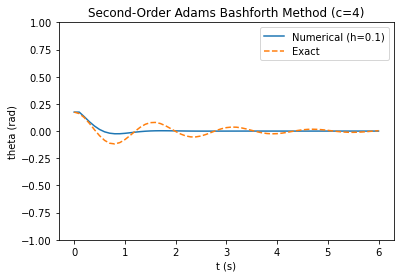

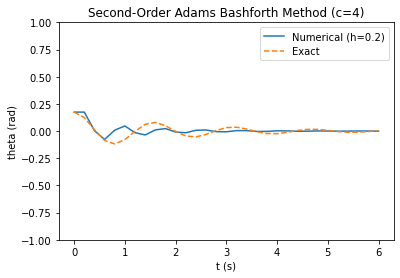

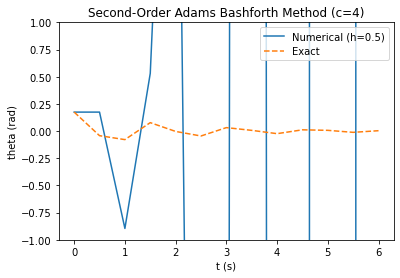

In [72]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
g = 9.81
L = 0.6
c = 4

# Define function for theta double dot
def theta_ddot(theta, theta_dot):
    return -c * theta_dot - (g / L) * theta

# Define function for Second-Order Adams Bashforth Method
def adams_bashforth_2(theta0, theta_dot0, h):
    # Initialize arrays
    t = np.arange(0, 6 + h, h)
    theta = np.zeros_like(t)
    theta_dot = np.zeros_like(t)

    # Use Explicit Euler to initialize the first two values of theta and theta_dot
    theta[0] = theta0
    theta_dot[0] = theta_dot0
    theta[1] = theta[0] + h * theta_dot[0]
    theta_dot[1] = theta_dot[0] + h * theta_ddot(theta[0], theta_dot[0])

    # Apply Second-Order Adams Bashforth Method
    for i in range(2, len(t)):
        theta[i] = theta[i - 1] + h * (3/2 * theta_dot[i - 1] - 1/2 * theta_dot[i - 2])
        theta_dot[i] = theta_dot[i - 1] + h * (3/2 * theta_ddot(theta[i - 1], theta_dot[i - 1])
                                               - 1/2 * theta_ddot(theta[i - 2], theta_dot[i - 2]))

    return t, theta

# Define exact solution
def exact_solution(t):
    A = 10 * np.pi / 180
    omega0 = np.sqrt(g / L)
    beta = c / (2 * omega0)
    omega = np.sqrt(omega0**2 - beta**2)

    theta = np.exp(-beta * t) * (A * np.cos(omega * t) + (beta / omega) * A * np.sin(omega * t))

    return theta

# Define function for plotting
def plot_solution(h):
    # Solve with Second-Order Adams Bashforth Method
    theta0 = 10 * np.pi / 180
    theta_dot0 = 0
    t, theta = adams_bashforth_2(theta0, theta_dot0, h)

    # Solve exact solution
    theta_exact = exact_solution(t)

    # Plot results
    plt.plot(t, theta, label=f"Numerical (h={h})")
    plt.plot(t, theta_exact, "--", label="Exact")
    plt.xlabel("t (s)")
    plt.ylabel("theta (rad)")
    plt.ylim([-1, 1])
    plt.legend()
    plt.title(f"Second-Order Adams Bashforth Method (c=4)")
    plt.show()

# Plot solutions for each h
for h in [0.1, 0.2, 0.5]:
    plot_solution(h)



# Problem 3

## Part 3-b

Solution converged after 21 iterations
T2(0) = 0.3651862144470215
x      T1(x)
0.0    5.0000
0.2    5.0170
0.4    4.9315
0.6    4.7604
0.8    4.5256
1.0    4.2551
1.2    3.9841
1.4    3.7578
1.6    3.6336
1.8    3.6837
2.0    4.0000


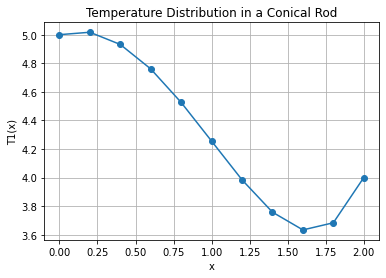

In [58]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt

# Define the functions a(x), b(x), and f(x)
def a(x):
    return -(x+3)/(x+1)

def b(x):
    return (x+3)/(x+1)**2

def f(x):
    return 2*(x+1) + 3*b(x)

# Define the system of first-order ODEs
def ode_system(x, y):
    dydx = np.zeros(2)
    dydx[0] = y[1]
    dydx[1] = -a(x)*y[1] - b(x)*y[0] + f(x)
    return dydx

# Define a function to integrate the system of ODEs using the 4th order Runge-Kutta method
def integrate_ode(T20):
    x_span = [0, 2] # integration interval
    y0 = [5, T20] # initial conditions
    sol = solve_ivp(ode_system, x_span, y0, t_eval=np.linspace(0, 2, 11))
    return sol.y[0][-1] # return T1(L)

# Set the tolerance and maximum number of iterations for the bisection method
tol = 1e-6
max_iter = 100

# Set the initial guesses for T2(0)
T20_1 = 1
T20_2 = -1

# Perform bisection to find the value of T2(0) that satisfies the boundary condition T1(L) = TB
iter = 0
while iter < max_iter:
    T1_L_1 = integrate_ode(T20_1)
    T1_L_2 = integrate_ode(T20_2)
    T1_L_mid = integrate_ode((T20_1 + T20_2)/2)
    if abs(T1_L_mid - 4) < tol:
        break
    elif T1_L_mid > 4:
        T20_1 = (T20_1 + T20_2)/2
    else:
        T20_2 = (T20_1 + T20_2)/2
    iter += 1

# Check if the bisection method converged
if iter == max_iter:
    print("Bisection method failed to converge")
else:
    print("Solution converged after", iter, "iterations")
    print("T2(0) =", (T20_1 + T20_2)/2)

# Integrate the system of ODEs using the 4th order Runge-Kutta method with the converged value of T2(0)
T20 = (T20_1 + T20_2)/2
x_span = [0, 2] # integration interval
y0 = [5, T20] # initial conditions
sol = solve_ivp(ode_system, x_span, y0, t_eval=np.linspace(0, 2, 11))

# Print the solution
print("x      T1(x)")
for i in range(len(sol.t)):
    print("{:.1f}    {:.4f}".format(sol.t[i], sol.y[0][i]))
    

# Plot the solution
plt.plot(sol.t, sol.y[0], 'o-', label='shooting method ')
plt.xlabel('x')
plt.ylabel('T1(x)')
plt.title('Temperature Distribution in a Conical Rod')
plt.grid()
plt.show()


# 3-c and d

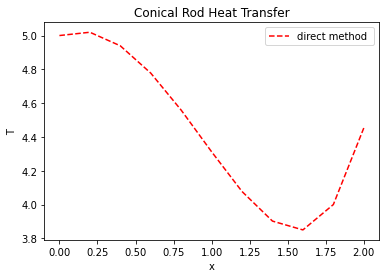

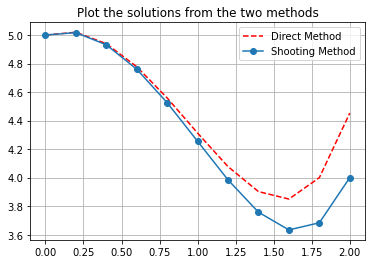

In [63]:
import numpy as np
import matplotlib.pyplot as plt

# Define parameters
h = 0.2
L = 2
n = int(L/h) + 1
x = np.linspace(0, L, n)

# Define functions
a_func = lambda x: (x + 3) / (x + 1)
b_func = lambda x: (x + 3) / (x + 1) ** 2
f_func = lambda x: 2 * (x + 1) + 3 * b_func(x)

alpha = np.zeros(n)
beta = np.zeros(n)
gamma = np.zeros(n)
f = np.zeros(n)

alpha[1:-1] = 1/h**2 + 0.5*a_func(x[1:-1])/h
beta[1:-1] = b_func(x[1:-1]) - 2/h**2
gamma[1:-1] = 1/h**2 - 0.5*a_func(x[1:-1])/h
f[1:-1] = f_func(x[1:-1])

# Boundary conditions
T_a = 5
T_b = 4
beta[0] = 1
gamma[0] = 0
f[0] = T_a

alpha[-1] = 1
beta[-1] = 0
f[-1] = T_b

# Solve tridiagonal system of equations
A = np.zeros((n, n))
A[0, 0] = beta[0]
A[0, 1] = gamma[0]

for i in range(1, n-1):
    A[i, i-1] = alpha[i]
    A[i, i] = beta[i]
    A[i, i+1] = gamma[i]

A[n-1, n-2] = alpha[n-1]
A[n-1, n-1] = beta[n-1]

T = np.linalg.solve(A, f)

# Plot solution
plt.plot(x, T, 'r--', label='direct method ')
plt.xlabel('x')
plt.ylabel('T')
plt.title('Conical Rod Heat Transfer')
plt.legend()
plt.show()



# Plot the solutions from the two methods
plt.plot(x, T, 'r--', label="Direct Method")
plt.plot(sol.t, sol.y[0], 'o-', label="Shooting Method")
plt.title('Plot the solutions from the two methods')
plt.legend()
plt.grid()
plt.show()

# Problem 4
## Part b

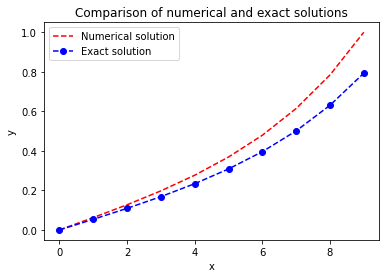

In [47]:
import numpy as np
import matplotlib.pyplot as plt

def main():
    # Define parameters
    h = 0.1
    a = 0
    b = 1
    n = int((b - a) / h)
    x = np.linspace(a, b, n+1)

    # Define matrices
    A = np.zeros((n, n))
    B = np.zeros((n, 1))

    A[0, 0] = 1
    A[n - 1, n - 1] = 1

    B[0] = 0
    B[n - 1] = 1

    # Define functions
    a_func = lambda x: 0
    b_func = lambda x: -9
    f_func = lambda x: -3 * x

    # Define exact solution
    y = (2 * np.exp(3) / (3 * (np.exp(6) - 1))) * np.exp(3 * x) - \
        (2 * np.exp(3) / (3 * (np.exp(6) - 1))) * np.exp(-3 * x) + \
        (1 / 3) * x

    # Fill matrices
    for i in range(1, n - 1):
        xi = x[i]

        A[i, i - 1] = 1 - h * a_func(xi)
        A[i, i] = -2 + b_func(xi) * h ** 2
        A[i, i + 1] = 1 + h * a_func(xi)

        B[i] = h ** 2 * f_func(xi)

    # Solve system of equations
    T = np.linalg.solve(A, B)

    # Plot solutions
    plt.plot(T, 'r--', label='Numerical solution')
    plt.plot(y[:-1], 'bo--', label='Exact solution')
    plt.legend()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.title('Comparison of numerical and exact solutions')
    plt.show()

if __name__ == '__main__':
    main()
